# 🧠🔬 Détection de Tumeurs Cérébrales avec un Réseau de Neurones Convolutif (CNN)
## 📊 Classification binaire d’IRM cérébrales


In [74]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [99]:
import os
#Changer le chemin avant exécution
os.chdir(r"C:\Users\yanis\OneDrive\Bureau\GIMA-IM\Deep_learning_intro\LARIBI_Yanis_projet_deep_learning")
os.listdir()

['brain_tumor_resized',
 'cnn_scratch_brain_tumor.keras',
 'LARIBI_Yanis_notebook_deep_learning.ipynb',
 'vgg16_architecture.png',
 'vgg16_brain_tumor.keras']

In [78]:
# Charger le modèle CNN
cnn_model = load_model("cnn_scratch_brain_tumor.keras")

# Charger le modèle VGG16
vgg16_model = load_model("vgg16_brain_tumor.keras")


In [80]:
cnn_model.summary()  # Vérifier l'architecture du CNN

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            6

 Total params: 4,990,916 (19.04 MB)

 Trainable params: 2,494,977 (9.52 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2,494,979 (9.52 MB)

In [82]:
vgg16_model.summary()  # Vérifier l'architecture du VGG16

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 29,366,597 (112.02 MB)

 Trainable params: 7,243,777 (27.63 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 14,487,556 (55.27 MB)

***Voici ci-après l'architecture de VGG-16 qui a été fine tuné pour convenir à notre tâche de classification binaire***

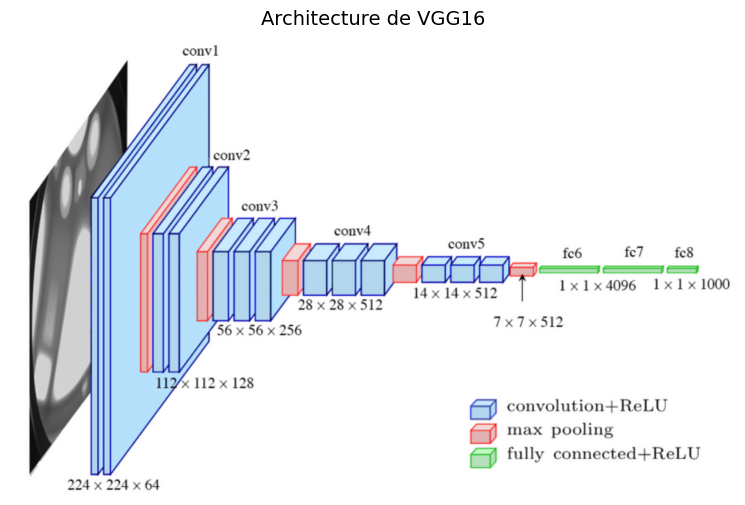

In [84]:
img = cv2.imread("vgg16_architecture.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
# Afficher l'image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off") 
plt.title("Architecture de VGG16", fontsize=14)
plt.show()

In [86]:
# Générateur sans augmentation pour le test
test_datagen = ImageDataGenerator(rescale=1./255)

# Recharger les images de test
test_generator = test_datagen.flow_from_directory(
    "brain_tumor_resized/test",
    target_size=(128, 128),
    batch_size=1,  # On prend une image à la fois pour éviter les erreurs
    class_mode='binary',
    shuffle=False  # Important pour garder l'ordre des prédictions
)

Found 29 images belonging to 2 classes.


In [88]:
# Obtenir les vraies classes
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # ["No", "Yes"]

# Faire des prédictions pour CNN
cnn_predictions = cnn_model.predict(test_generator)
cnn_predicted_classes = (cnn_predictions > 0.5).astype("int32").flatten()

# Faire des prédictions pour VGG16
vgg_predictions = vgg16_model.predict(test_generator)
vgg_predicted_classes = (vgg_predictions > 0.5).astype("int32").flatten()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


## <a id="predict"></a> 📸 Prédictions sur de Nouvelles Images

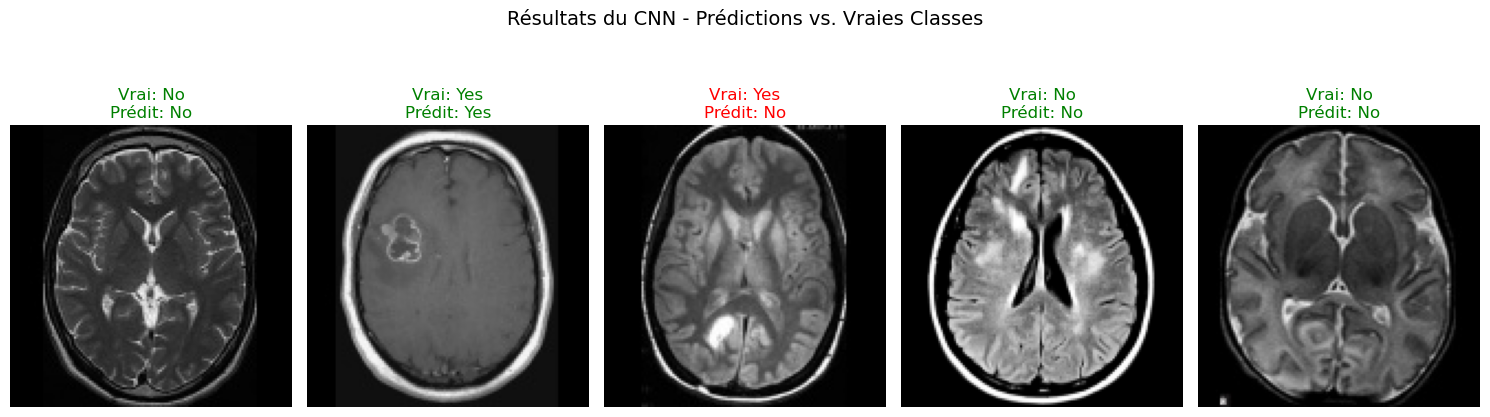

In [94]:
# Sélectionner aléatoirement 5 images pour affichage
indices = random.sample(range(len(true_labels)), 5)

#  Affichage des résultats pour CNN
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, idx in enumerate(indices):
    img_path = test_generator.filepaths[idx]  # Chemin de l’image
    img = plt.imread(img_path)  # Charger l’image

    # Déterminer la couleur du texte (vert si correct, rouge si erreur)
    color = "green" if true_labels[idx] == cnn_predicted_classes[idx] else "red"

    axes[i].imshow(img, cmap='gray')
    axes[i].axis("off")
    axes[i].set_title(f"Vrai: {class_labels[true_labels[idx]]}\nPrédit: {class_labels[cnn_predicted_classes[idx]]}", color=color)

plt.suptitle("Résultats du CNN - Prédictions vs. Vraies Classes", fontsize=14)
plt.tight_layout()
plt.show()


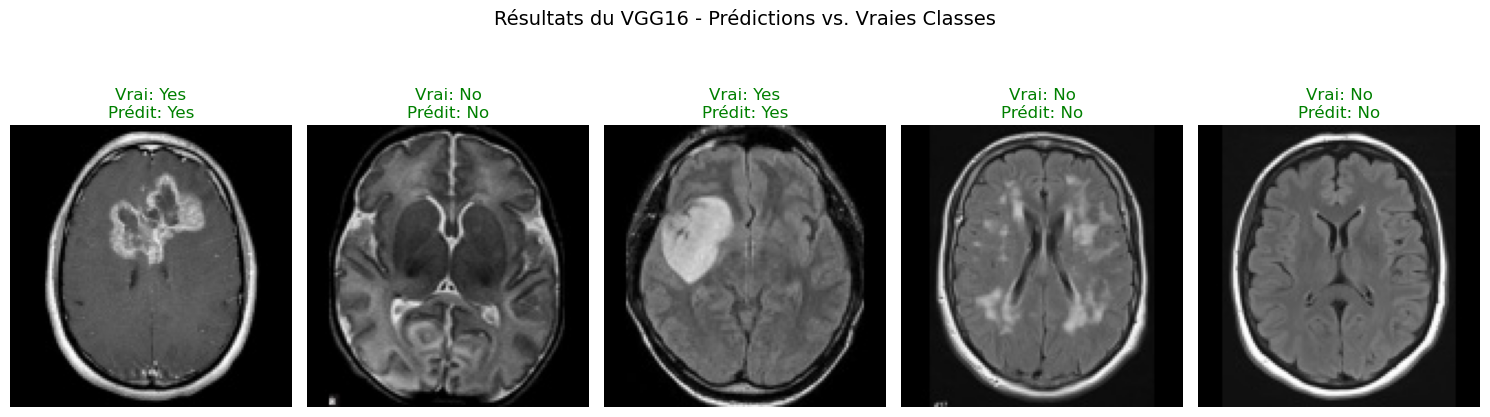

In [92]:
# Sélectionner aléatoirement 5 images pour affichage
indices = random.sample(range(len(true_labels)), 5)


#  Affichage des résultats pour VGG16
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, idx in enumerate(indices):
    img_path = test_generator.filepaths[idx]  # Chemin de l’image
    img = plt.imread(img_path)  # Charger l’image

    # Déterminer la couleur du texte (vert si correct, rouge si erreur)
    color = "green" if true_labels[idx] == vgg_predicted_classes[idx] else "red"

    axes[i].imshow(img, cmap='gray')
    axes[i].axis("off")
    axes[i].set_title(f"Vrai: {class_labels[true_labels[idx]]}\nPrédit: {class_labels[vgg_predicted_classes[idx]]}", color=color)

plt.suptitle("Résultats du VGG16 - Prédictions vs. Vraies Classes", fontsize=14)
plt.tight_layout()
plt.show()
